Optimal k-value : 6


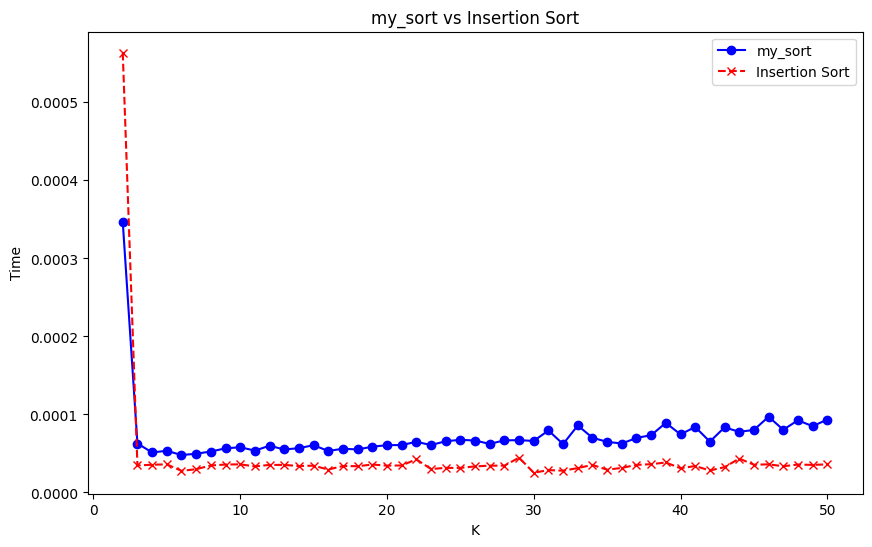

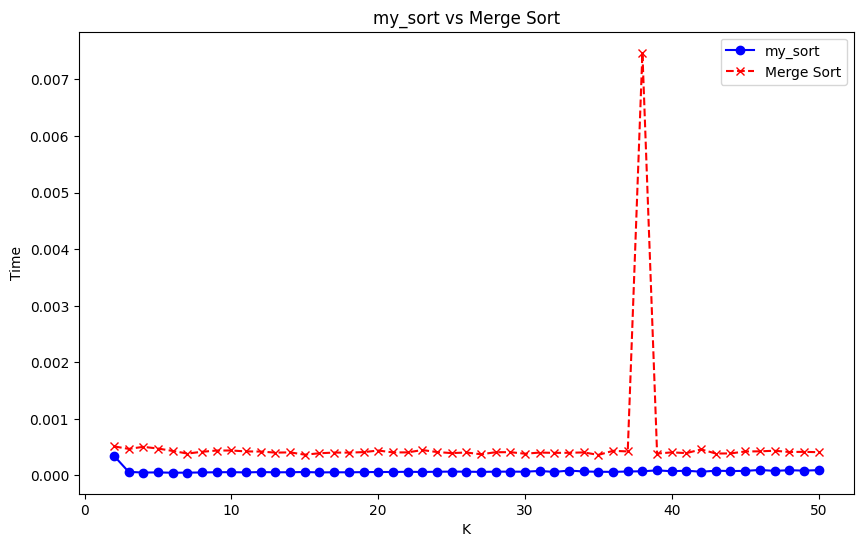

In [3]:
from itertools import islice
import time
import matplotlib.pyplot as plt
import random
sortd=[]
l=[]
k_value=[]
t1=[]
insertsort=[]
mergsort=[]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2  # Find the middle of the array
        left_half = arr[:mid]  # Divide the array into two halves
        right_half = arr[mid:]
        merge_sort(left_half)
        merge_sort(right_half)
        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
    # print(arr)

def my_sort(n,l):
    I=iter(n)
    O=[list(islice(I, elem))
        for elem in l]
    for j in O:
        insertion_sort(j)
    # print("O:",O)
    merged_list = []
    for sublist in O:
        merged_list.extend(sublist)
    return sorted(merged_list)

n=[]
for i in range(100):
   n.append(random.randint(1,100))
k=len(n)//2
la=0
for i in range(2,k+1):# for sub-arrays to be split
    s=len(n)//i
    for j in range(i):
        if (j==i-1) and (len(n)%i!=0):
            l.append(s+1)
            break
        l.append(s)
    k_value.append(i)
    start=time.time()
    sor=my_sort(n,l)
    end=time.time()
    t1.append(end-start)
    # sortd.append(sor)
    l=[]

    start,end=0,0
    start=time.time()
    insertion_sort(n)
    end=time.time()
    insertsort.append(end-start)

    start,end=0,0
    start=time.time()
    merge_sort(n)
    end=time.time()
    mergsort.append(end-start)
# print("Time :",t1)
# print(insertsort)
# print(mergsort)
m=min(t1)
ind=t1.index(m)
print("Optimal k-value :",k_value[ind])

plt.figure(figsize=(10, 6))
plt.plot(k_value,t1,label='my_sort', marker='o', linestyle='-', color='b')
plt.plot(k_value,insertsort,label='Insertion Sort', marker='x', linestyle='--', color='r')
plt.xlabel('K')
plt.ylabel('Time')
plt.title("my_sort vs Insertion Sort")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_value,t1,label='my_sort', marker='o', linestyle='-', color='b')
plt.plot(k_value,mergsort,label='Merge Sort', marker='x', linestyle='--', color='r')
plt.xlabel('K')
plt.ylabel('Time')
plt.title("my_sort vs Merge Sort")
plt.legend()
plt.show()

